# DATA column

pxx-<font color=green>location as pitch crosses the plate. X=0 means right down the middle</font>
pzz-location as pitch crosses the plate. Z=0 means the ground
start_speedSpeed of the pitch just as it's thrown
end_speedSpeed of the pitch when it reaches the plate
spin_rateThe pitch's spin rate, measure in RPM
spin_dirDirection in which pitch is spinning, measured in degrees
break_angle
break_length
break_y
ax
ay
az
sz_bot
sz_top
type_confidenceConfidence in pitch_type classification. Goes up to 2 for some reason.
vx0
vy0
vz0
x
x0
y
y0
z0
pfx_x
pfx_z
nasty
zone
codeRecords the result of the pitch. See dataset description for list of codes and their meaning
typeSimplified code, S (strike) B (ball) or X (in play)
pitch_typeType of pitch. See dataset description for list of pitch types
event_numevent number, used for finding when exactly ejections happen.
b_scorescore for the batter's team
ab_idat-bat ID. Matches up with atbats.csv
b_countballs in the current count
s_countstrikes in the current count
outsnumber of outs (before pitch is thrown)
pitch_numpitch number (of at-bat)
on_1bTrue if there's a runner on first, False if empty
on_2bTrue if there's a runner on second, False if empty
on_3bI don't know

# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [2]:
dataset = pd.read_csv('pitches_c.csv')

In [3]:
dataset.dropna(inplace=True)
#dataset.drop(["EP", "FO", "PO", "SC", "UN", "IN"],inplace = True)
#y.droap(["EP", "FO", "PO", "SC", "UN","IN"],inplace = True)

In [9]:
#dataset.head(10)
list(dataset)

['px',
 'pz',
 'start_speed',
 'end_speed',
 'spin_rate',
 'spin_dir',
 'break_angle',
 'break_length',
 'break_y',
 'ax',
 'ay',
 'az',
 'sz_bot',
 'sz_top',
 'type_confidence',
 'vx0',
 'vy0',
 'vz0',
 'x',
 'x0',
 'y',
 'y0',
 'z0',
 'pfx_x',
 'pfx_z',
 'nasty',
 'zone',
 'code',
 'type',
 'event_num',
 'b_score',
 'ab_id',
 'b_count',
 's_count',
 'outs',
 'pitch_num',
 'on_1b',
 'on_2b',
 'on_3b']

In [4]:
X = dataset.iloc[0:100000, 0:9].values
list(X)

[array([  4.16000000e-01,   2.96300000e+00,   9.29000000e+01,
          8.41000000e+01,   2.30505200e+03,   1.59235000e+02,
         -2.50000000e+01,   3.20000000e+00,   2.37000000e+01]),
 array([ -1.91000000e-01,   2.34700000e+00,   9.28000000e+01,
          8.41000000e+01,   2.68993500e+03,   1.51402000e+02,
         -4.07000000e+01,   3.40000000e+00,   2.37000000e+01]),
 array([ -5.18000000e-01,   3.28400000e+00,   9.41000000e+01,
          8.52000000e+01,   2.64797200e+03,   1.45125000e+02,
         -4.37000000e+01,   3.70000000e+00,   2.37000000e+01]),
 array([ -6.41000000e-01,   1.22100000e+00,   9.10000000e+01,
          8.40000000e+01,   1.28959000e+03,   1.69751000e+02,
         -1.30000000e+00,   5.00000000e+00,   2.38000000e+01]),
 array([   -1.821,     2.083,    75.4  ,    69.6  ,  1374.569,   280.671,
           18.4  ,    12.   ,    23.8  ]),
 array([  6.27000000e-01,   2.39700000e+00,   9.29000000e+01,
          8.48000000e+01,   2.74385600e+03,   1.48110000e+02,
       

In [5]:
# Import Dependent Variable
y = dataset.iloc[0:100000, 29].values

y

# Encoding the Dependent Variable
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder_y = LabelEncoder()
#y = labelencoder_y.fit_transform(y)

#convert y into binary format
#from keras.utils import to_categorical
#y_binary = to_categorical(y)

array(['FF', 'FF', 'FF', ..., 'FF', 'FF', 'FF'], dtype=object)

# Split data into trainning set and test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Fitting Kernel SVM to the Training set
import time
start = time.time()


from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)


end = time.time()
print(end - start)

156.80106806755066


In [9]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

np.savetxt("cm.csv", cm, delimiter=",")

In [10]:
#Visualize CM
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.set_size_inches(19.5, 10.5)
    #fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[2153   17    0    0   30   96    0    0   65    2    0    6    0  120
   166]
 [  23 1266    0    0    1    0    0    0    0    0   13    6    0    0
   338]
 [   2   11    0    0    0    0    0    0    0    1    0    0    0    0
     0]
 [   0    0    0    0    1    0    0    0    1    0    0    0    0    0
     0]
 [  27    0    0    0  590  391    0    0    9    2    0    0    0    2
   597]
 [  66    0    0    0  139 7931    0    0  410    1    0    0    0   63
    50]
 [   7    0    0    0    0    0    0    0    1    0    0    0    0    0
     1]
 [ 323    3    0    0    0    7    0    0    6    0    0    1    0   17
    77]
 [ 142    3    0    0   16  743    0    0 1731    0    0    0    0  331
    12]
 [   3    0    1    0    0    1    0    0    0  119    0    0    0    0
     0]
 [   7  349    0    0    0    0    0    0    0    0   44    1    0    0
   145]
 [  20   34    0    0    0    0    0    0    0    0    0   57    0    0
    19]


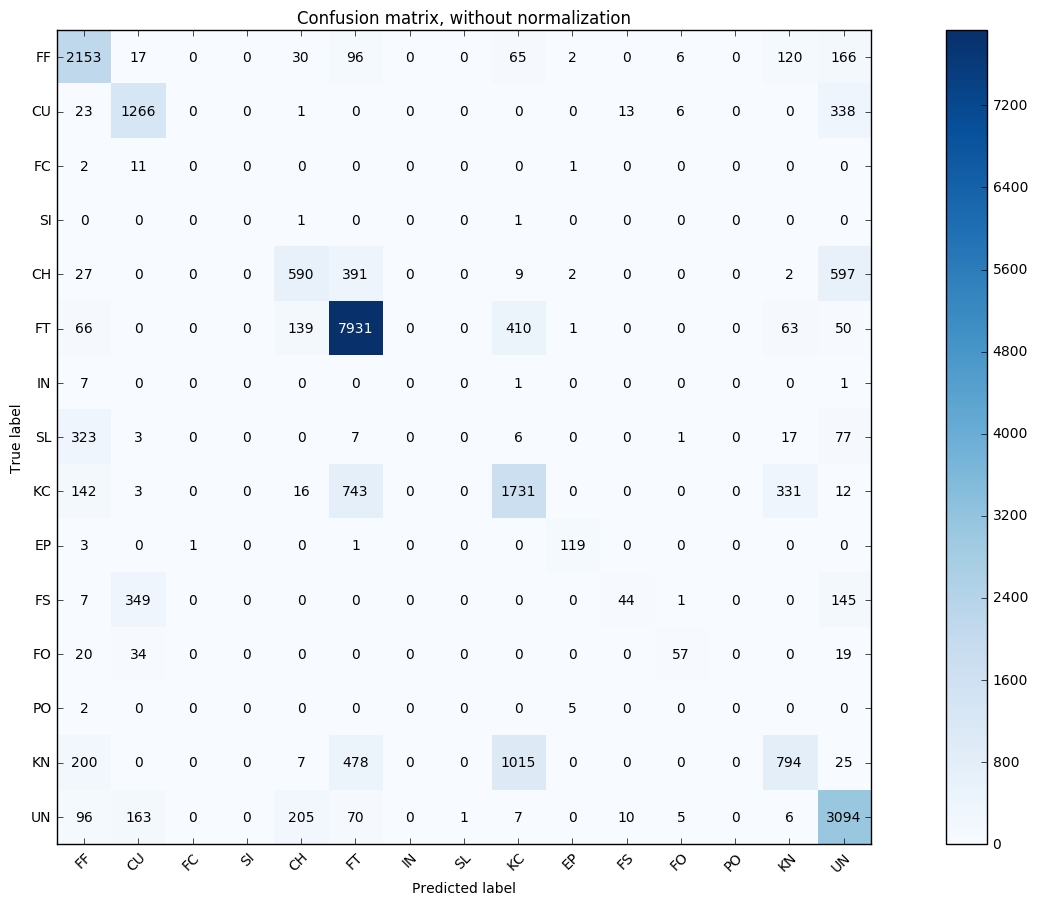

In [11]:
# Plot non-normalized confusion matrix
class_names = dataset['pitch_type'].unique()
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
#plot_confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), classes=class_names, normalize=True,
#                     title='Normalized confusion matrix')
plt.show()

In [17]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()
accuracies.std()

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default valu

0.004419120338455435

In [16]:
#evaluate test result accuracy and so on
from sklearn.metrics import accuracy_score
precision = accuracy_score(y_test, y_pred)

print ("precision :",precision)

precision : 0.71116


In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred,average='samples')
print ("recall :",recall)